In [33]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))

In [3]:
colNames = names(which(sapply(df.lot_frontage, is.character)))
colNames = c(colNames, "LotFrontage")

df.lot_frontage %>% summarise(total.var=var(LotFrontage))

q = df.lot_frontage %>% select(colNames) %>% gather(attr, attr_val, -LotFrontage)
q = q %>% group_by(attr, attr_val) %>% 
          summarise(var=var(LotFrontage), var2=ifelse(is.na(var), 0, var), n=n()) %>%
          mutate(freq = n / sum(n), freq.var = var2 * freq) %>%
          summarise(var.expect = sum(freq.var)) %>%
          arrange(var.expect)
head(q)

total.var
544.9846


attr,var.expect
MSSubClass,353.7170
BldgType,393.4762
Neighborhood,402.6314
MSZoning,469.6790
GarageType,492.3924
OverallQual,504.5258


In [9]:
x = kaggle.house.meanVariationSplitByCategoricalAttrs(df.lot_frontage, LotFrontage)
head(x)

x = kaggle.house.meanVariationSplitByCategoricalAttrs(df.lot_frontage, LotFrontage.Log)
head(x)

attr,var.expect
MSSubClass,353.7170
BldgType,393.4762
Neighborhood,402.6314
MSZoning,469.6790
GarageType,492.3924
OverallQual,504.5258


attr,var.expect
MSSubClass,0.05575422
BldgType,0.06432255
Neighborhood,0.07503564
MSZoning,0.10432530
Exterior2nd,0.11478941
GarageType,0.11642288


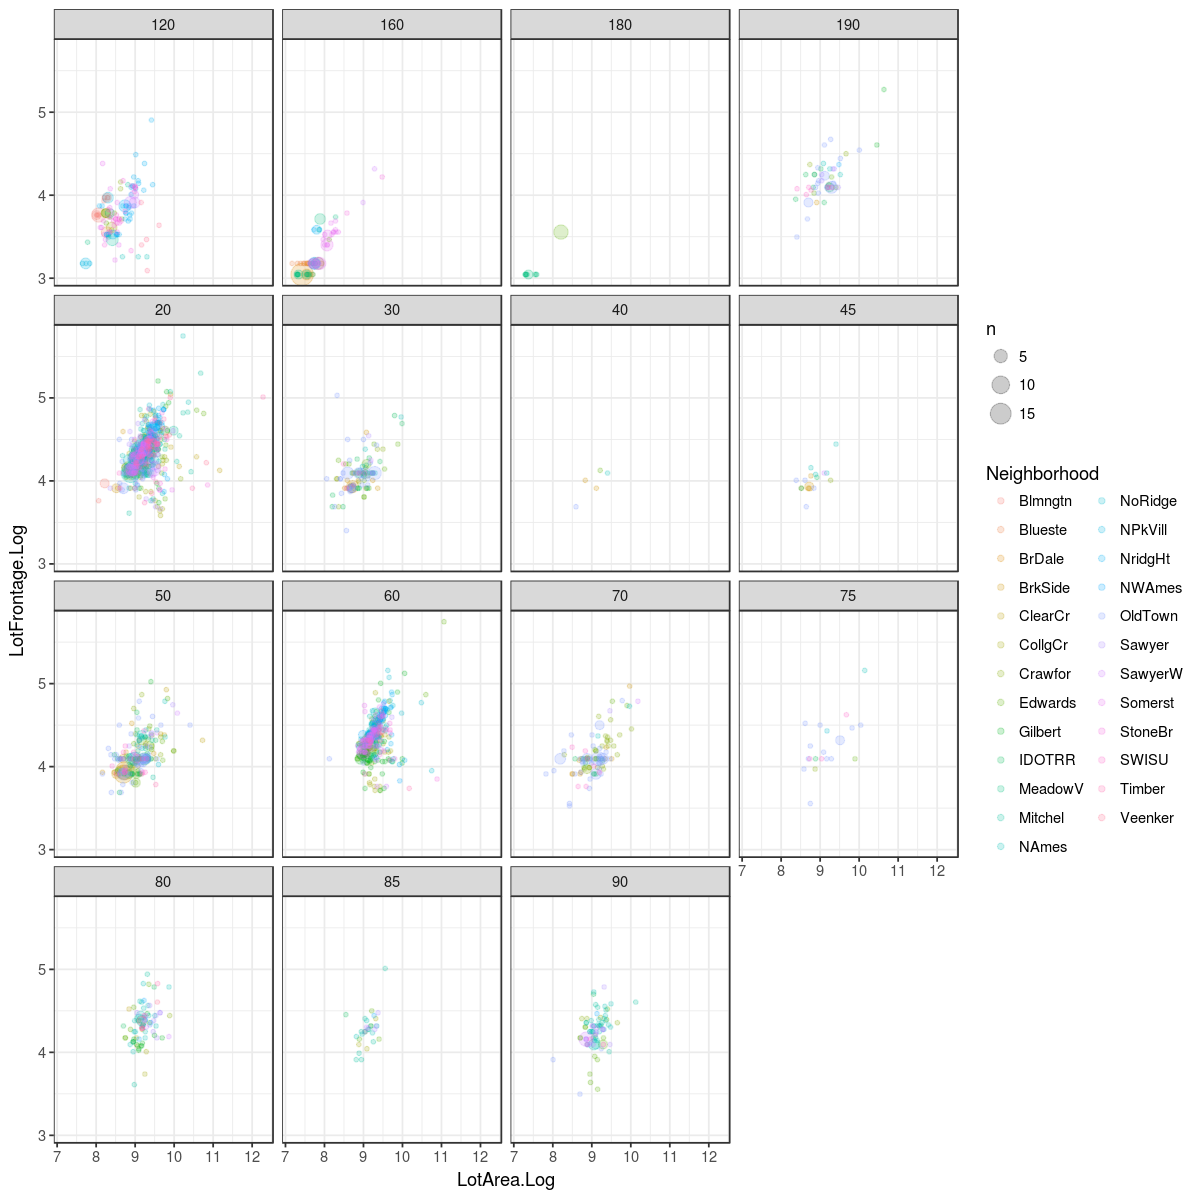

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = Neighborhood), alpha=0.2) +
    facet_wrap(~ MSSubClass) +
    theme_bw()

In [30]:
x = df.lot_frontage %>% select_if(is.numeric)

y = cor(x %>% select(LotFrontage.Log), x %>% select(-LotFrontage, -LotFrontage.Log), use="complete.obs")
y = as.data.frame(y) %>% gather(attr, corr) %>% mutate(abs.corr = abs(corr)) %>% arrange(desc(abs.corr))
y %>% head(20)


cor(df.lot_frontage %>% select(LotArea.Log, X1stFlrSF.Log, GarageArea) %>% na.omit())

attr,corr,abs.corr
LotArea.Log,0.7655517,0.7655517
X1stFlrSF.Log,0.4581599,0.4581599
LotArea,0.4517571,0.4517571
X1stFlrSF,0.4238417,0.4238417
TotRmsAbvGrd.Log,0.3523618,0.3523618
GarageArea,0.3462477,0.3462477
TotRmsAbvGrd,0.3453025,0.3453025
GrLivArea,0.3352909,0.3352909
GarageArea.Log,0.3287358,0.3287358
TotalBsmtSF,0.3261279,0.3261279


,LotArea.Log,X1stFlrSF.Log,GarageArea
LotArea.Log,1.0000000,0.4888376,0.3446128
X1stFlrSF.Log,0.4888376,1.0000000,0.5007681
GarageArea,0.3446128,0.5007681,1.0000000


In [36]:
df = df.lot_frontage %>% 
    select(LotFrontage, LotArea) %>% 
    mutate(LotFrontage.Log = log(LotFrontage), LotArea.Log = log(LotArea))

model.lm <- lm(LotFrontage.Log ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea, data = df)
print(summary(model.lm)$r.squared)

[1] 0.5871939
[1] 0.467189
[1] 0.2399977


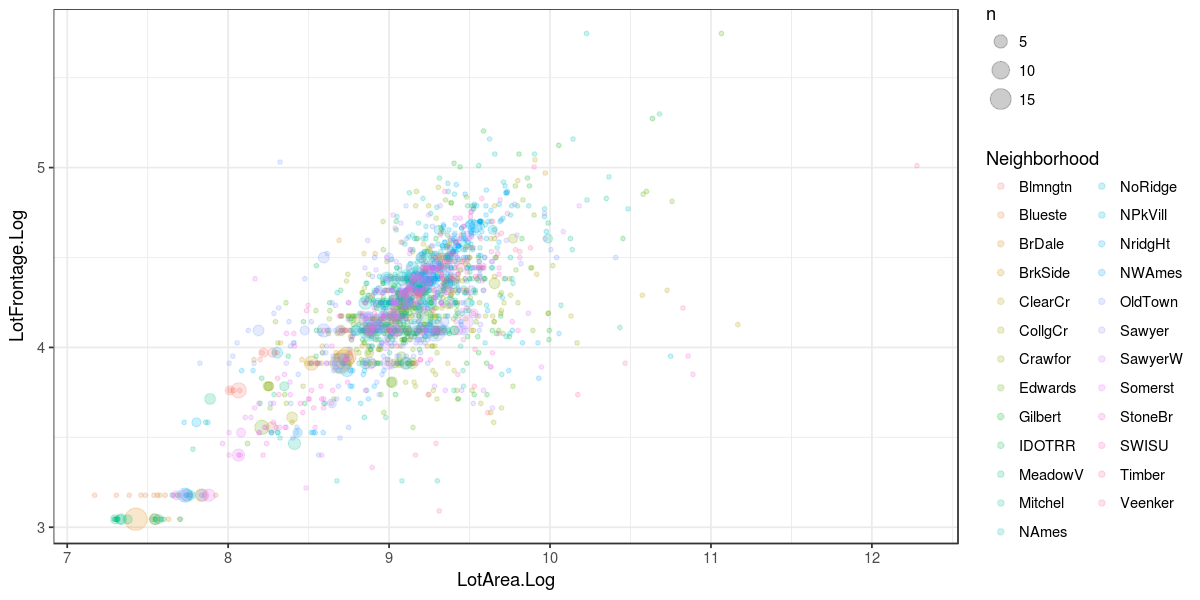

In [37]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = Neighborhood), alpha=0.2) +
    theme_bw()

[1] 0.5871939
[1] 0.467189
[1] 0.2399977


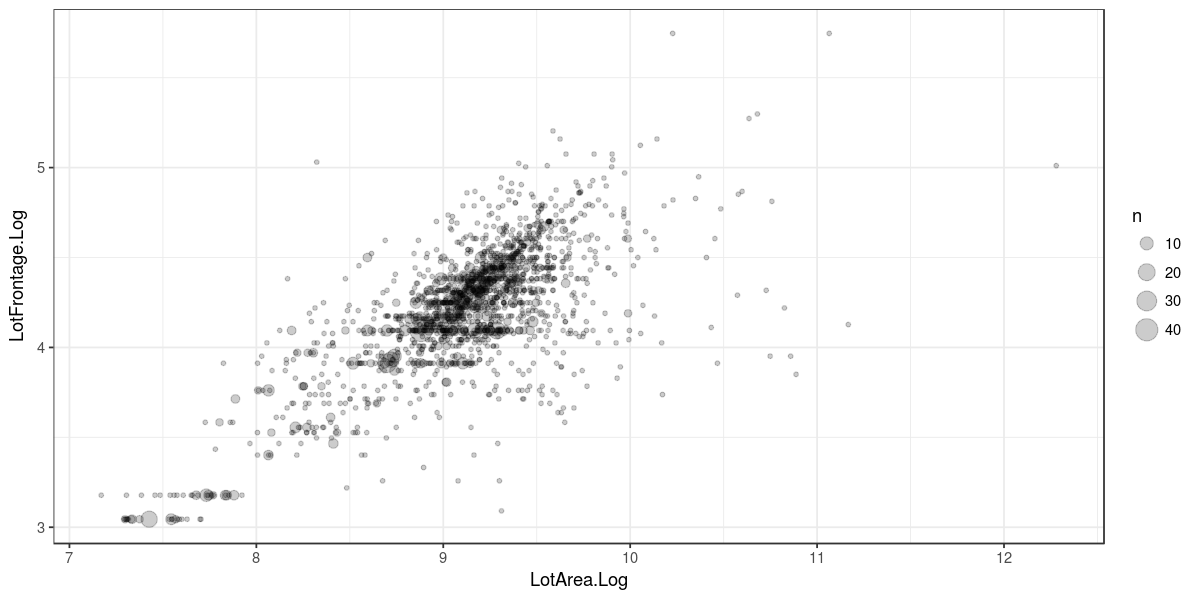

In [39]:
#df.lot_frontage %>% group_by(LotFrontage) %>% summarise(n=n()) %>% arrange(desc(n)) %>% head(10)

df = df.lot_frontage %>% 
    select(LotFrontage, LotArea) %>% 
    mutate(LotFrontage.Log = log(LotFrontage), LotArea.Log = log(LotArea))

model.lm <- lm(LotFrontage.Log ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea, data = df)
print(summary(model.lm)$r.squared)

options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(alpha=0.2) +
    theme_bw()

[1] 0.4254683
[1] 0.3908742
[1] 0.1900287


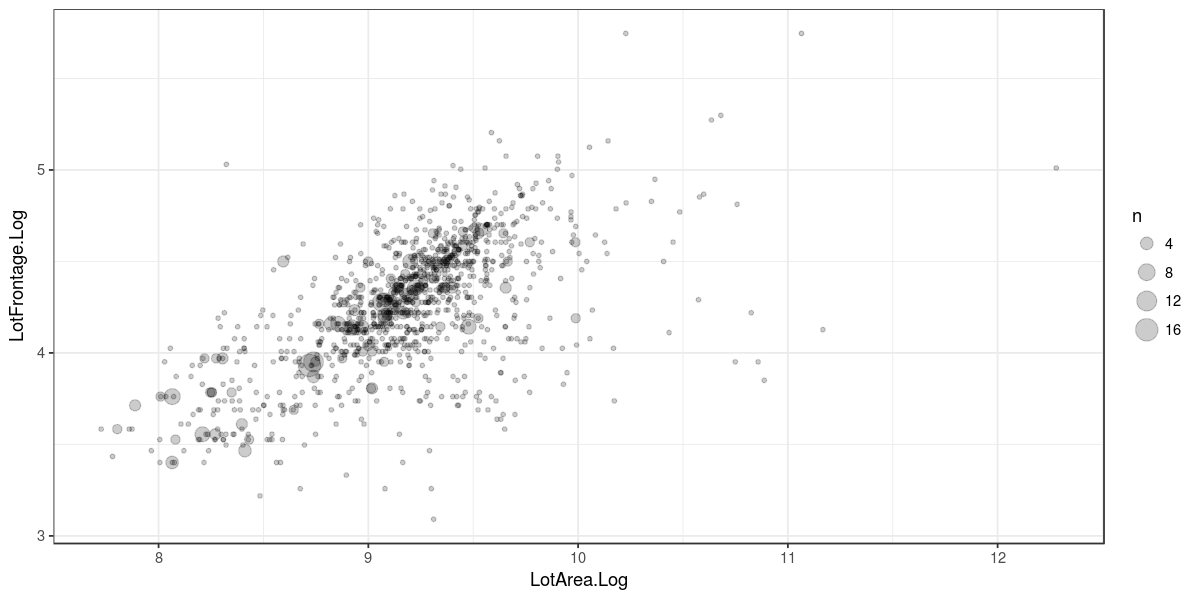

In [38]:
#df.lot_frontage %>% group_by(LotFrontage) %>% summarise(n=n()) %>% arrange(desc(n)) %>% head(10)

df = df.lot_frontage %>% 
    filter(!LotFrontage %in% c(60, 80, 70, 50, 75, 65, 85, 21, 24)) %>%
    select(LotFrontage, LotArea) %>% 
    mutate(LotFrontage.Log = log(LotFrontage), LotArea.Log = log(LotArea))

model.lm <- lm(LotFrontage.Log ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea, data = df)
print(summary(model.lm)$r.squared)

options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(alpha=0.2) +
    theme_bw()

[1] 0.7758739
[1] 0.6874668
[1] 0.4588347


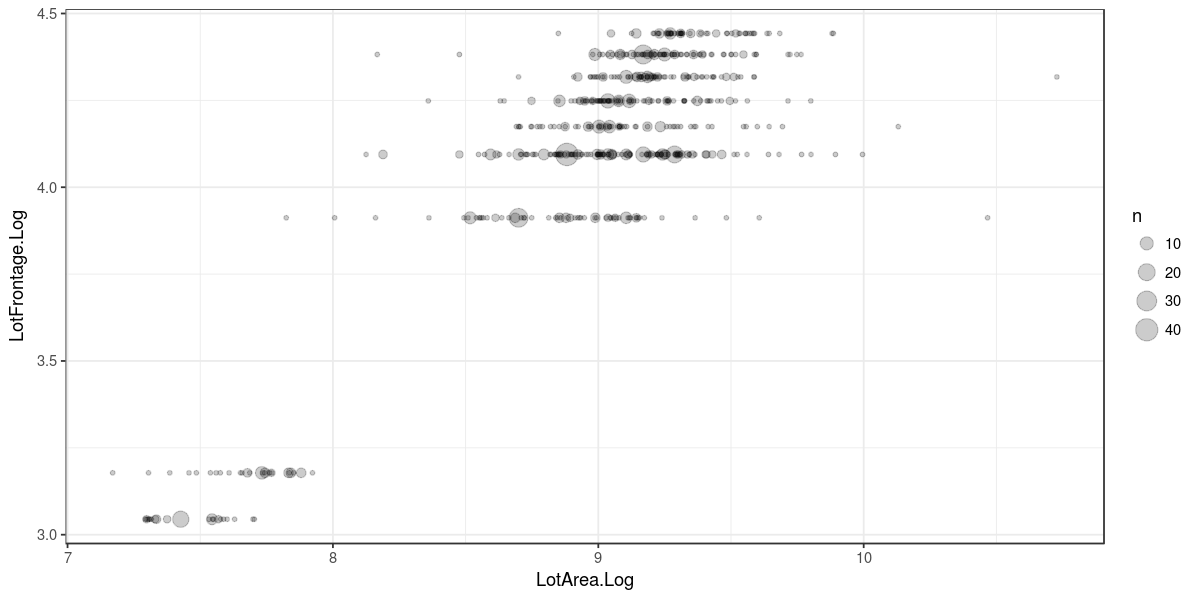

In [18]:
df = df.lot_frontage %>% 
    filter(LotFrontage %in% c(60, 80, 70, 50, 75, 65, 85, 21, 24)) %>%
    select(LotFrontage, LotArea) %>% 
    mutate(LotFrontage.Log = log(LotFrontage), LotArea.Log = log(LotArea))

model.lm <- lm(LotFrontage.Log ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea.Log, data = df)
print(summary(model.lm)$r.squared)

model.lm <- lm(LotFrontage ~ LotArea, data = df)
print(summary(model.lm)$r.squared)

options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(alpha=0.2) +
    theme_bw()

In [37]:
df = df.lot_frontage %>%
    mutate(LotFrontage.is.60 = LotFrontage == 60) %>%
    select(LotFrontage.is.60, Neighborhood) %>%
    group_by(Neighborhood, LotFrontage.is.60) %>%
    summarise(n=n()) %>%
    mutate(freq = n / sum(n)) %>%
    arrange(desc(LotFrontage.is.60), desc(freq))

df %>% head()

Neighborhood,LotFrontage.is.60,n,freq
SWISU,TRUE,17,0.3863636
OldTown,TRUE,83,0.3624454
IDOTRR,TRUE,31,0.3563218
Edwards,TRUE,29,0.1629213
BrkSide,TRUE,15,0.1578947
NAmes,TRUE,54,0.1440000


In [37]:
df.data = df.lot_frontage

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.data %>% 
      select(colNames) %>% 
      gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
      group_by(attr, attr_val) %>% 
      summarise(corr=cor(LotFrontage.Log, LotArea.Log), n=n()) %>%
      mutate(freq = n / sum(n), freq.corr = corr * freq) %>%
      summarise(corr.expect = sum(freq.corr)) %>%
      arrange(desc(corr.expect))

attr,corr.expect
LotConfig,0.8017319
LotConfig2,0.8000421
LandSlope,0.7711157
LandContour,0.7707438
Heating,0.7673014
BsmtFinType2,0.7669929
dataSource,0.7657865
Street,0.7657465
PoolQC,0.7639298
ExterCond,0.7637476


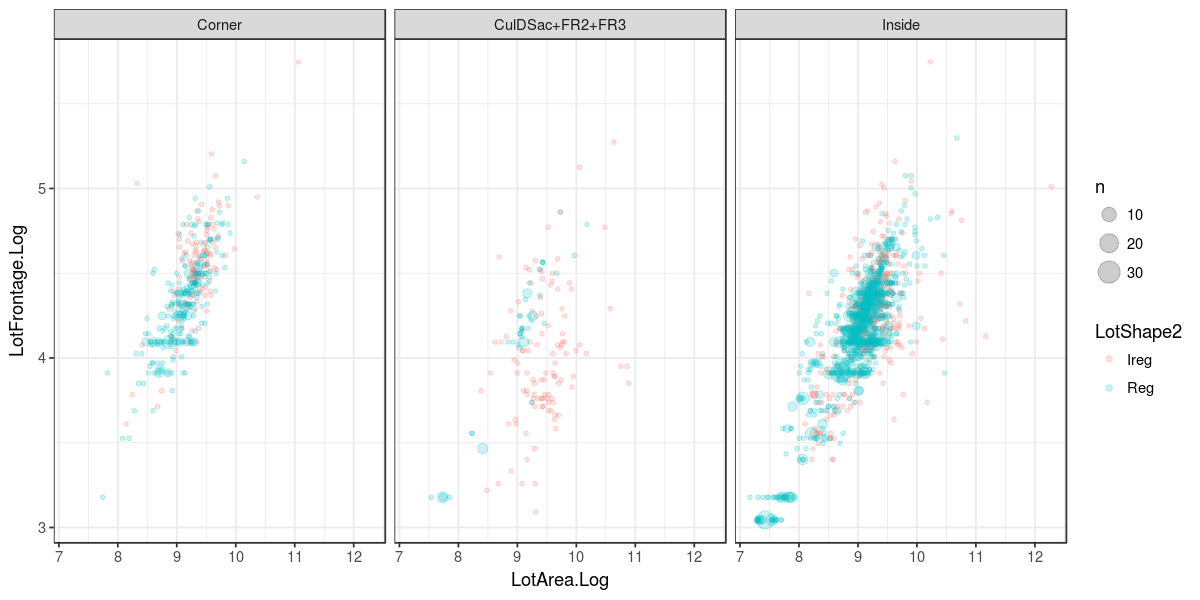

In [26]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = LotShape2), alpha=0.2) +
    facet_wrap(~LotConfig2) +
    theme_bw()

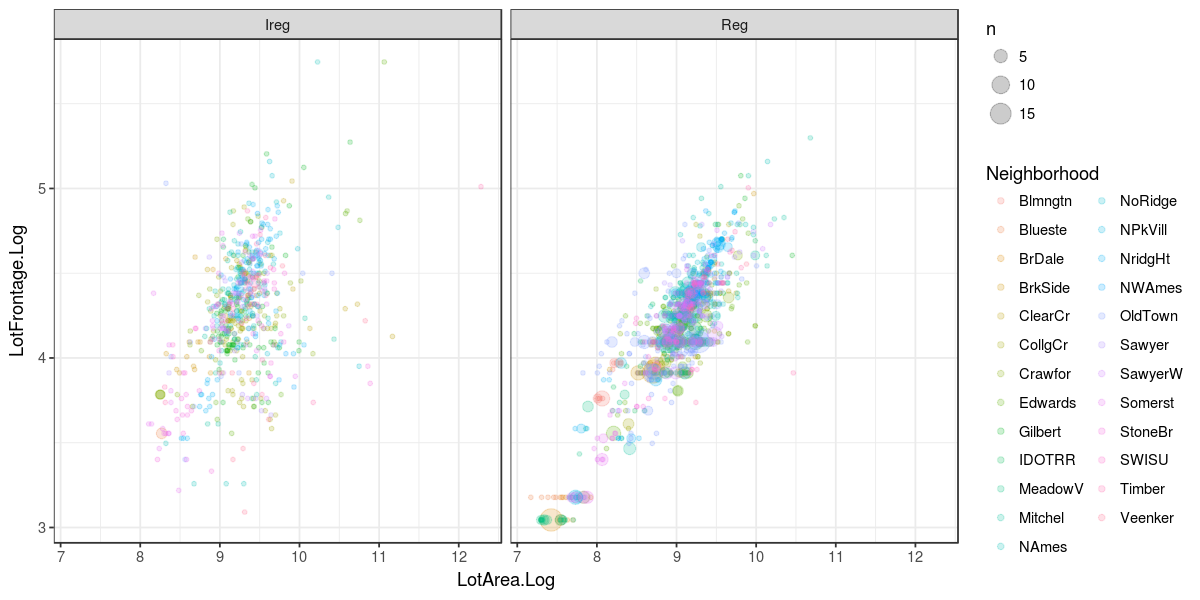

In [27]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = Neighborhood), alpha=0.2) +
    facet_wrap(~ LotShape2) +
    theme_bw()

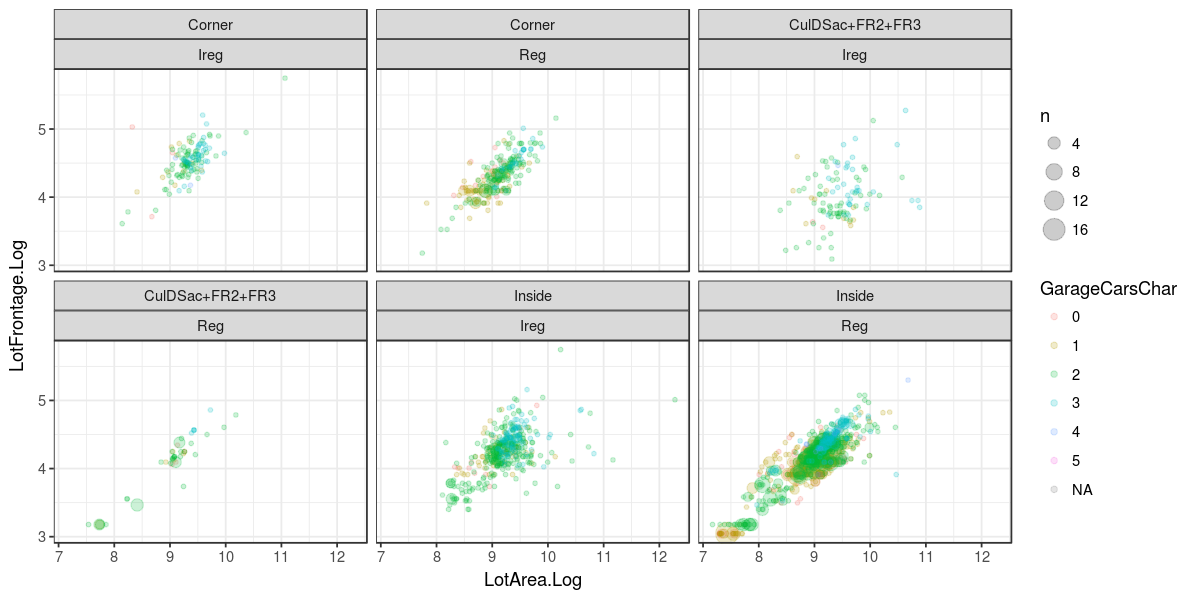

In [34]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = GarageCarsChar), alpha=0.2) +
    facet_wrap(LotConfig2 ~ LotShape2) +
    theme_bw()

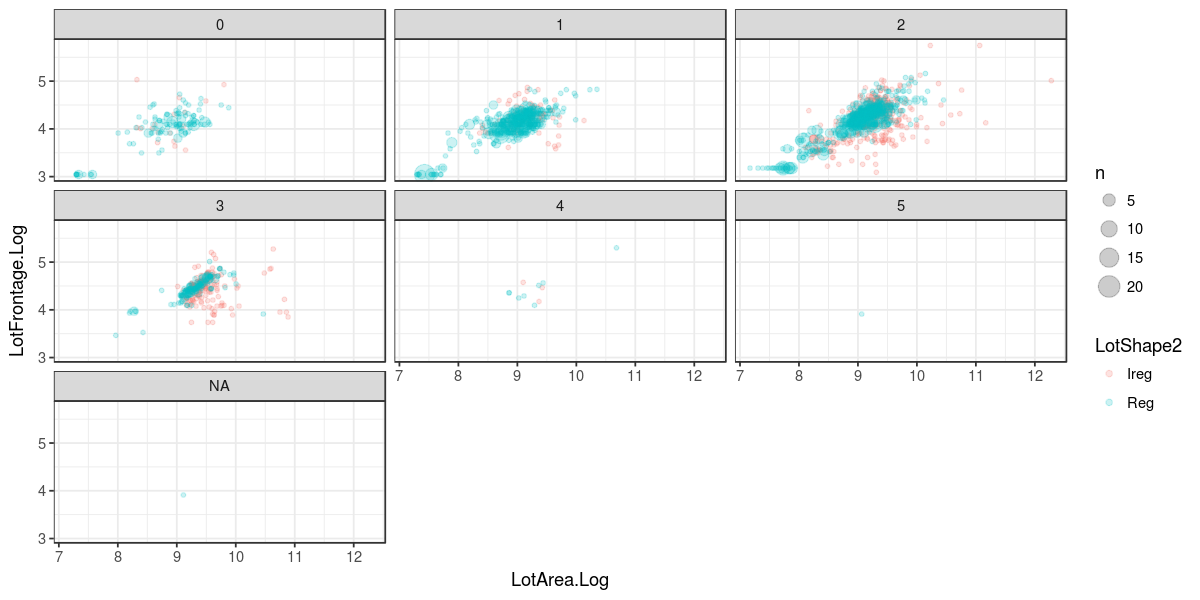

In [36]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(df.lot_frontage, aes(x=LotArea.Log, y=LotFrontage.Log)) +
    geom_count(aes(colour = LotShape2), alpha=0.2) +
    facet_wrap(~ GarageCarsChar) +
    theme_bw()